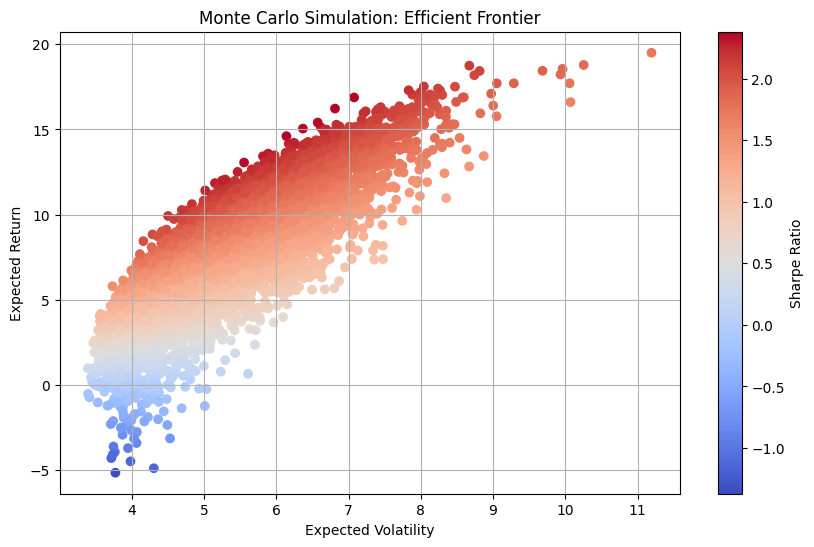

Optimal Portfolio:
Expected Return: 16.8818
Expected Volatility: 7.0771
Sharpe Ratio: 2.3826
Optimal Portfolio Weights (Sharpe Ratio Maximization):
AAPL: 16.8818
MSFT: 7.0771
GOOGL: 2.3826


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assets
assets = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'FB', 'JPM']
noa = len(assets)  # Number of assets

# Data Retrieval for the previous 2 years
np.random.seed(42)
n_days = 730
dates = pd.date_range(start='2022-01-01', periods=n_days, freq='D')
asset_data = pd.DataFrame(np.random.randn(n_days, noa), columns=assets, index=dates).cumsum()

# Calculate mean returns and covariance matrix
mean_returns = asset_data.mean()
cov_matrix = asset_data.cov()

# Risk-free rate (e.g., 10-year Treasury yield)
risk_free_rate = 0.02  # Example value (adjust as needed)

# Optimize portfolio weights using Sharpe ratio
def optimize_portfolio(mean_returns, cov_matrix, risk_free_rate):
    num_portfolios = 10000
    results = np.zeros((3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(noa)
        weights /= np.sum(weights)  # Ensure sum of weights equals 1

        # Portfolio metrics
        portfolio_return = np.sum(mean_returns * weights)
        portfolio_volatility = math.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

        results[0, i] = portfolio_return
        results[1, i] = portfolio_volatility
        results[2, i] = sharpe_ratio

    return results

# Monte Carlo simulation
simulation_results = optimize_portfolio(mean_returns, cov_matrix, risk_free_rate)

# Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(simulation_results[1, :], simulation_results[0, :], c=simulation_results[2, :], marker='o', cmap='coolwarm')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Monte Carlo Simulation: Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

# Print optimal portfolio details
max_sharpe_idx = np.argmax(simulation_results[2, :])
optimal_return = simulation_results[0, max_sharpe_idx]
optimal_volatility = simulation_results[1, max_sharpe_idx]
print("Optimal Portfolio:")
print(f"Expected Return: {optimal_return:.4f}")
print(f"Expected Volatility: {optimal_volatility:.4f}")
print(f"Sharpe Ratio: {simulation_results[2, max_sharpe_idx]:.4f}")

# Extract and print optimal weights
optimal_weights = simulation_results[:, max_sharpe_idx][:noa]  # Extract weights from simulation results
print("Optimal Portfolio Weights (Sharpe Ratio Maximization):")
for asset, weight in zip(assets, optimal_weights):
    print(f"{asset}: {weight:.4f}")
